In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Data Pre-processing

<img src="dcr.png" alt="title1" width="1150"/>

# Agenda

| Module | Session | Topic |
| --- | --- | --- |
| 1 | 1 | Data Pre-processing and COVID-19 |
| 1 | 2 | Probabilities of Default (PDs) - Expected PDs|
| 2 | 1 | Machine Learning Concepts |
| 2 | 2 | Machine Learning Validation |
| 3 | 1 | Supervised Machine Learning for PDs | 
| 3 | 2 | Supervised Machine Learning for PDs |
| 4 | 1 | Neural Networks and Deep Learning |
| 4 | 2 | Probabilities of Default (PDs) - Crisis PDs |


# Synopsis

 - Introduction to data and Python
 - Efficient use of raw data
 - Role of missing values and outliers
 - Imputation techniques


# Credit Risk Information

## Internal Data

 - Origination/underwriting data
 - Performance data
 - Modification data
 - Payoff/retention data
 - Maturity data
 - Default/workout data
 

## External Data

 - Macroeconomic information
 - Population statistic
 - Business filings
 - Social networks
 - External experts such as ratings agencies or property appraisers
 - Payment systems
 - ...


## Our Data & Code

 - Mortgage data
 - Download data `dcr.csv` and file `dcr.py` from www.deepcreditrisk.com
 - Place data and file in a directory 
 - Change all paths in dcr.py from `'C:/TMP'` to your preferred directory
 - Video: https://www.youtube.com/watch?v=f68ChMfhwvM&t=342s


# Data Organization

 - Borrower IDs
 - Time stamps
 - Information features at observation time
 - Information features at loan origination
 - Outcome observations


## ID and Time Stamps

 - `id`: borrower id
 - `time`: time stamp of observation
 - `orig_time`: time stamp for origination
 - `first_time`: time stamp for first observation
 - `mat_time`: time stamp for maturity
 - `res_time`: time stamp for resolution
 

## Time-varying Information

 - `balance_time`: outstanding balance at observation time
 - `LTV_time`: loan to value ratio at observation time, in %
 - `interest_rate_time`: interest rate at observation time, in %
 - `rate_time`: risk-free rate, in %
 - `hpi_time`: house price index at observation time, base year=100
 - `gdp_time`: GDP growth at observation time, in %
 - `uer_time`: unemployment rate at observation time, in %


## Origination Information

 - `REtype_CO_orig_time`: real estate type — condominium: 1, otherwise: 0
 - `REtype_PU_orig_time`: real estate type — planned urban developments: 1, otherwise: 0
 - `REtype_SF_orig_time`: real estate type — single family home: 1, otherwise: 0
 - `investor_orig_time`: investor borrower: 1, otherwise: 0
 - `balance_orig_time`: outstanding balance at origination time
 - `FICO_orig_time`: FICO score at origination time, in %
 - `LTV_orig_time`: loan to value ratio at origination time, in %
 - `Interest_Rate_orig_time`: interest rate at origination time, in %
 - `state_orig_time`: US state in which the property is located
 - `hpi_orig_time`: house price index at observation time, base year=100

## Outcome Information

 - `default_time`: default observation at observation time
 - `payoff_time`: payoff observation at observation time
 - `status_time`: default (1), payoff (2) and non-default/non-payoff (0) observation at observation time
 - `lgd_time`: LGD assuming no discounting of cash flows, at default time
 - `recovery_res`: sum of all cash flows received during resolution period


## Loan-to-Value Ratio

LTV at observation time is based on:
 - LTV at loan origination `(LTV_orig_time)`
 - Change in house prices (measured by HPI)
 - Amortization:
 \begin{align*}
\text{LTV_time}=\frac{\text{balance_time}}{\text{house price at time}}
\end{align*}
 - House price at time:
\begin{align*}
\text{house price at time}=\frac{\text{balance_orig_time}}{\text{LTV_orig_time}}*\frac{\text{hpi_time}}{\text{hpi_orig_time}}
\end{align*}


# Applications

 - Basel: minimum amount of required Tier I and Tier II capital
 - Current Expected Credit Loss (CECL), IFRS 9: loan loss provisions
 - National stress tests: requirement of additional capital buffers
 - Comprehensive Capital Analysis and Review (CCAR): requirement of additional capital buffers

# COVID19


| Challenge | Solution | Module |
| --- | --- | --- |
| Calculating Crisis PDs without downturn data  | Model-based measurement of crisis PDs, Parameter-based stress-testing (Margin of conservatism, Bayesian approach) | Module 4 — Crisis PDs/Stress-testing |
| Calculating Crisis PDs with downturn data | Scenario-based stress-testing, Parameter-based stress-testing (Regime-switching models) | Module 4 — Stress-testing|
| Liquidity as a driver of default | Estimation of models with liquidity as feature; Inclusion of additional liquidity feature (e.g., income over non-discretionary expenses) | Module 1 |
| Equity as a driver of default | Estimation of models with equity as feature; Inclusion of additional equity feature (e.g., home improvement/deterioration) | Module 1 |
| Impact of time effects | TVA Analysis: control for vintage and age effects through dummy variables or other features that describe the origination process and for time effects through macroeconomic features | Module 1 and 4  | 
| Validation of pre-crisis models | Backtesting: split training and validation sample along time dimension | Module 2 |
| Ability of machine learning models to predict defaults for severe downturns | Backtesting of machine learning approaches | Module 3 and 4 |
 | Adequacy of model estimates for application| Comparison of Basel capital with expected loss | Module 4 – Crisis PDs |


# Setup

In [11]:
import warnings; warnings.simplefilter('ignore')
from dcr import *

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

ModuleNotFoundError: No module named 'pydot'

# Python Literacy

## Print Data

In [6]:
import pandas as pd 
data = pd.read_csv('C:/Users/Rachel/Documents/Raquel/Masterclass on PD Machine Learning in Python/dcr.csv')

In [7]:

data2 = data[['id', 'time', 'gdp_time', 'FICO_orig_time', 'LTV_time']].round(decimals=2)
print(data2) 

          id  time  gdp_time  FICO_orig_time  LTV_time
0          4    25      2.90             587     33.91
1          4    26      2.15             587     34.01
2          4    27      2.36             587     34.34
3          4    28      1.23             587     34.67
4          4    29      1.69             587     34.95
...      ...   ...       ...             ...       ...
62173  49972    52      1.08             708    103.31
62174  49972    53      0.89             708     95.74
62175  49972    54      1.51             708     91.87
62176  49972    55      2.42             708     91.56
62177  49972    56      1.72             708     90.87

[62178 rows x 5 columns]


## Describing Data

In [7]:
print(data.shape)

(62178, 28)


In [8]:
data2 = data[['FICO_orig_time', 'LTV_orig_time', 'gdp_time']]

print(data2.describe().round(decimals=2))

       FICO_orig_time  LTV_orig_time  gdp_time
count        62178.00       62178.00  62178.00
mean           673.36          78.70      1.38
std             72.10          10.24      1.95
min            429.00          50.10     -4.15
25%            628.00          75.00      1.10
50%            675.00          80.00      1.85
75%            730.00          80.00      2.69
max            819.00         119.80      5.13


In [9]:
table = pd.crosstab(data.orig_time, columns='count', margins= True)

print(table)

col_0      count    All
orig_time              
-40           51     51
-35            4      4
-33            3      3
-24            1      1
-23            1      1
...          ...    ...
57             4      4
58             3      3
59            14     14
60             9      9
All        62178  62178

[73 rows x 2 columns]


## Plotting

In [9]:
FICO = data.groupby('time')['FICO_orig_time'].mean().reset_index(drop=False)

plt.plot('time', 'FICO_orig_time', data=FICO)
plt.xlabel('Origination time')
plt.ylabel('FICO')
plt.ylim([400, 850])
plt.show()

NameError: name 'plt' is not defined

## Generating New Variables

In [12]:
data.loc[:, 'dummy'] = 0
data.loc[data['LTV_time'] > 95, 'dummy'] = 1

print(data[['LTV_time','dummy']].round(decimals=2))

       LTV_time  dummy
0         33.91      0
1         34.01      0
2         34.34      0
3         34.67      0
4         34.95      0
...         ...    ...
62173    103.31      1
62174     95.74      1
62175     91.87      0
62176     91.56      0
62177     90.87      0

[62178 rows x 2 columns]


## Subsetting Data

In [13]:
data2 = data[['FICO_orig_time']]

print(data2.shape)

(62178, 1)


In [14]:
data2 = data.loc[:, 'FICO_orig_time'].copy()

data2 = data.iloc[:, 19].copy()

print(data2.shape)

(62178,)


In [15]:
data2 = data.loc[0, :].copy()

data2 = data.iloc[0, :].copy()

print(data2.shape)

(29,)


In [22]:
data2 = data.query('FICO_orig_time >= 800').copy()

print(data2)

          id  time  orig_time  first_time  mat_time  res_time  balance_time  \
53     20443    59         59          59       177       NaN     630392.94   
54     20443    60         59          59       177       NaN     627841.96   
55     20444    59         59          59       177       NaN     691646.41   
56     20444    60         59          59       177       NaN     311520.28   
67     20455    60         60          60       178       NaN    1093905.69   
...      ...   ...        ...         ...       ...       ...           ...   
61877  49668    56         19          52       139       NaN     167332.30   
61878  49668    57         19          52       139       NaN     165916.74   
61879  49668    58         19          52       139       NaN     164490.08   
61880  49668    59         19          52       139       NaN     163052.25   
61881  49668    60         19          52       139       NaN     161603.16   

        LTV_time  interest_rate_time  rate_time  ..

In [17]:
data2 = data.sample(100, random_state=12345).copy()

print(data2.shape)

(100, 29)


In [18]:
data2 = data.drop('LTV_orig_time', axis='columns').copy()

print(data2.shape)

(62178, 28)


In [19]:
data2 = data.drop(0, axis='rows').copy()

print(data2.shape)

(62177, 29)


## Resetting Indexes

In [19]:
data2 = data2.reset_index(drop=False)

print(data2)

       index     id  time  orig_time  first_time  mat_time  res_time  \
0          1      4    26         -2          25       119       NaN   
1          2      4    27         -2          25       119       NaN   
2          3      4    28         -2          25       119       NaN   
3          4      4    29         -2          25       119       NaN   
4          5      4    30         -2          25       119       NaN   
...      ...    ...   ...        ...         ...       ...       ...   
62172  62173  49972    52         25          52       145       NaN   
62173  62174  49972    53         25          52       145       NaN   
62174  62175  49972    54         25          52       145       NaN   
62175  62176  49972    55         25          52       145       NaN   
62176  62177  49972    56         25          52       145       NaN   

       balance_time    LTV_time  interest_rate_time  ...  LTV_orig_time  \
0          60882.42   34.007232              10.500  ...    

## Regression Models

In [23]:
model_ols = smf.ols(formula='LTV_time ~ LTV_orig_time + gdp_time', data=data).fit()


NameError: name 'smf' is not defined

In [ ]:
dir(model_ols)

In [21]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               LTV_time   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     8772.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:38:43   Log-Likelihood:            -2.8781e+05
No. Observations:               62153   AIC:                         5.756e+05
Df Residuals:                   62150   BIC:                         5.756e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8450      0.773     17.901

## `numpy` vs `pandas`

 - `pandas` : 
  - Dataframes:  enhanced arrays as they can be accessed by integer positions (e.g., for rows) as well as labels (e.g., columns/features)
  - Range of econometric data operations, including sampling, aggregation, leading/lagging 
 - `numpy`: 
  - Processing of multi-dimensional arrays
  - Arrays are accessed by their integer position with zero as a base



# Missing Features Analysis

 - Processes may not work
 - Missing features are generally informative
 - Create a new variable `FICO_orig_time2`: missing value in 80% of observations with a FICO score of less than 650


In [22]:
sample = data.query('FICO_orig_time <= 650')

print(sample.shape)

(22694, 29)


In [23]:
ref = sample.sample(int(0.8*len(sample)), random_state=12345).index

data.loc[:,'FICO_orig_time2'] = data.FICO_orig_time
data.loc[:,'FICO_orig_time2'].iloc[ref] = np.NaN

print(data[['FICO_orig_time', 'FICO_orig_time2']]) 

       FICO_orig_time  FICO_orig_time2
0                 587              NaN
1                 587              NaN
2                 587              NaN
3                 587              NaN
4                 587            587.0
...               ...              ...
62173             708            708.0
62174             708            708.0
62175             708            708.0
62176             708            708.0
62177             708            708.0

[62178 rows x 2 columns]


## Option 1: Keeping Missing Values

In [24]:
data2 = data[['FICO_orig_time', 'FICO_orig_time2']]

print(data2.describe().round(decimals=2))

       FICO_orig_time  FICO_orig_time2
count        62178.00         44023.00
mean           673.36           704.74
std             72.10            56.77
min            429.00           458.00
25%            628.00           669.00
50%            675.00           704.00
75%            730.00           750.00
max            819.00           819.00


## Option 2: Deleting Missing Values

In [25]:
data3 = data2.dropna(subset=['FICO_orig_time2'])

print(data3.describe().round(decimals=2))

       FICO_orig_time  FICO_orig_time2
count        44023.00         44023.00
mean           704.74           704.74
std             56.77            56.77
min            458.00           458.00
25%            669.00           669.00
50%            704.00           704.00
75%            750.00           750.00
max            819.00           819.00


## Option 3: Imputation of Missing Values

### Imputation Strategy 1

In [26]:
data['FICO_orig_time_cat'] = 0
data.loc[data['FICO_orig_time2'] >= 400, 'FICO_orig_time_cat'] = 1
data.loc[data['FICO_orig_time2'] >= 450, 'FICO_orig_time_cat'] = 2
data.loc[data['FICO_orig_time2'] >= 500, 'FICO_orig_time_cat'] = 3
data.loc[data['FICO_orig_time2'] >= 550, 'FICO_orig_time_cat'] = 4
data.loc[data['FICO_orig_time2'] >= 600, 'FICO_orig_time_cat'] = 5
data.loc[data['FICO_orig_time2'] >= 650, 'FICO_orig_time_cat'] = 6
data.loc[data['FICO_orig_time2'] >= 700, 'FICO_orig_time_cat'] = 7
data.loc[data['FICO_orig_time2'] >= 750, 'FICO_orig_time_cat'] = 8
data.loc[data['FICO_orig_time2'] >= 800, 'FICO_orig_time_cat'] = 9

data['FICO_i1'] = pd.Categorical(data.FICO_orig_time_cat, ordered=False)

### Imputation Strategy 2

In [27]:
FICO_orig_time_cat_means = data.groupby('FICO_orig_time_cat')[['FICO_orig_time2', 'default_time']].mean().round(decimals=3).reset_index(drop=False)

print(FICO_orig_time_cat_means.round(decimals=3))

   FICO_orig_time_cat  FICO_orig_time2  default_time
0                   0              NaN         0.033
1                   2          486.029         0.029
2                   3          527.310         0.036
3                   4          575.971         0.040
4                   5          627.524         0.034
5                   6          674.289         0.024
6                   7          722.518         0.021
7                   8          770.582         0.011
8                   9          806.794         0.008


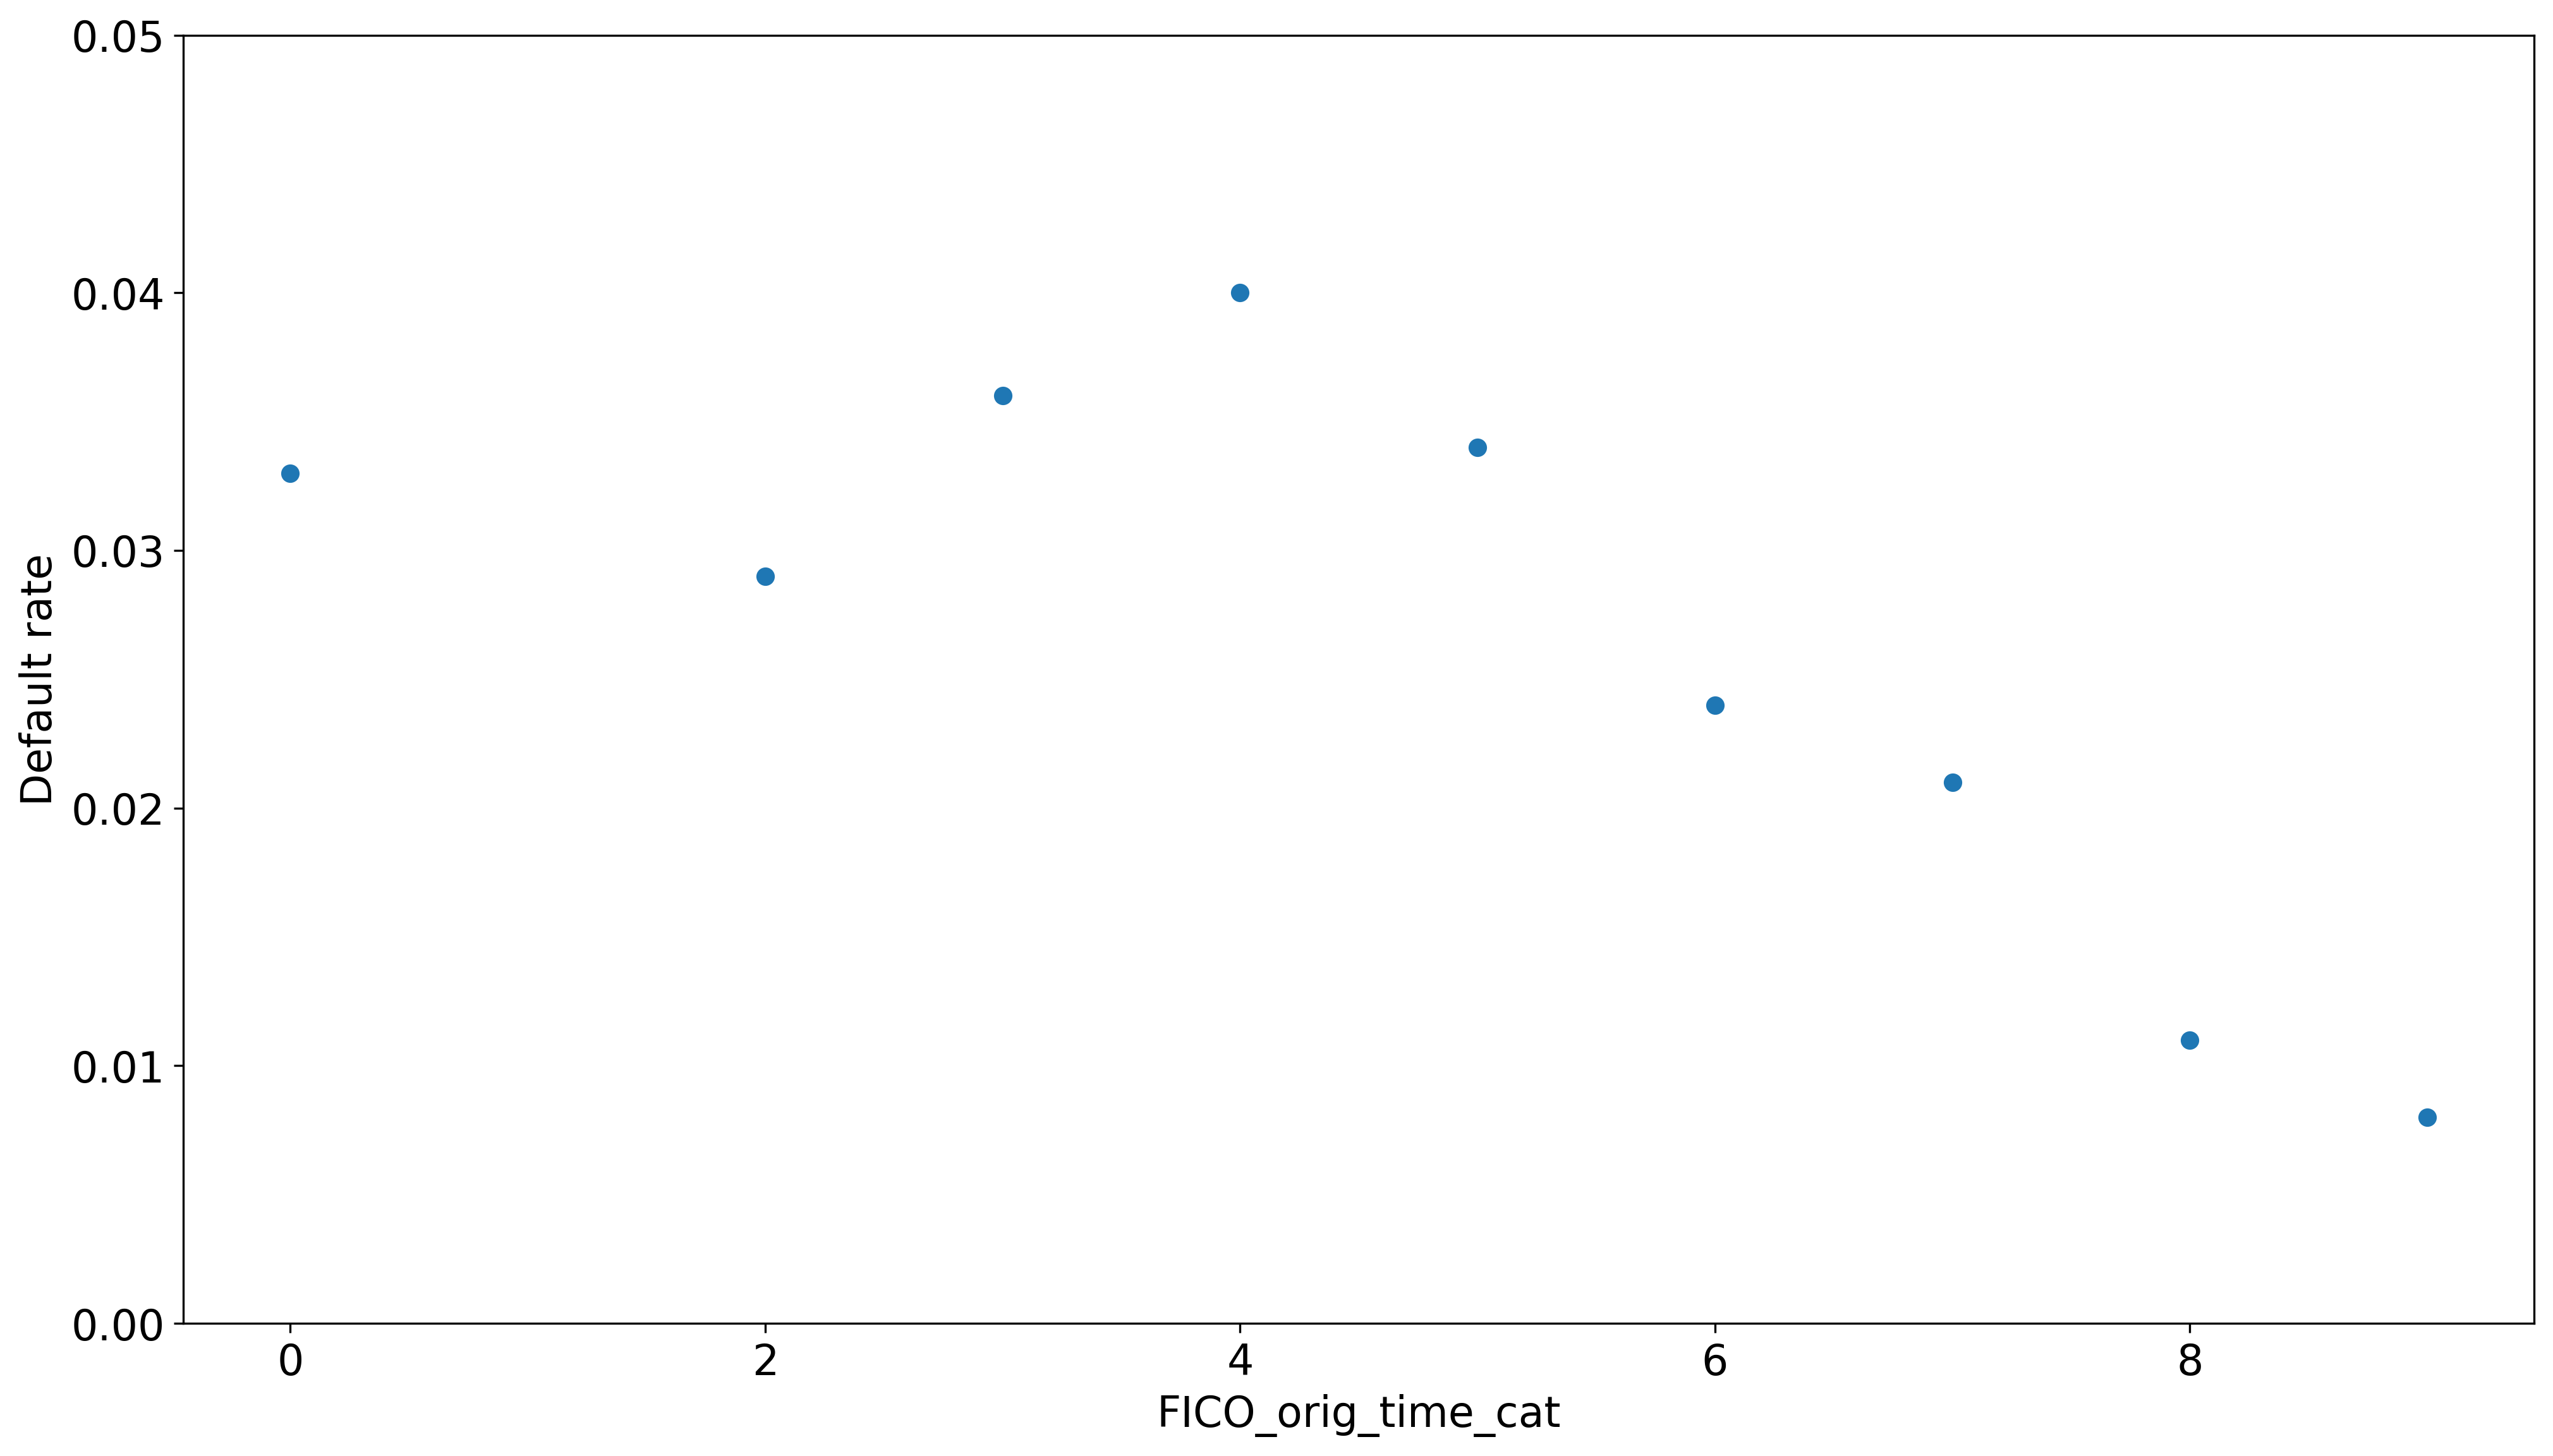

In [28]:
plt.scatter('FICO_orig_time_cat', 'default_time', data=FICO_orig_time_cat_means)
plt.xlabel('FICO_orig_time_cat')
plt.ylabel('Default rate')
plt.ylim([0, 0.05])
plt.show()

In [29]:
print(FICO_orig_time_cat_means)

data['FICO_i2'] = data.FICO_orig_time2
data['FICO_i2']= data.FICO_i2.replace(np.NaN,627.524)

   FICO_orig_time_cat  FICO_orig_time2  default_time
0                   0              NaN         0.033
1                   2          486.029         0.029
2                   3          527.310         0.036
3                   4          575.971         0.040
4                   5          627.524         0.034
5                   6          674.289         0.024
6                   7          722.518         0.021
7                   8          770.582         0.011
8                   9          806.794         0.008


### Imputation Strategy 3

In [30]:
replace = data['FICO_orig_time2'].median()

data['FICO_i3'] = data.FICO_orig_time2
data.loc[:,'FICO_i3'] = data.FICO_i3.replace(np.NaN,replace)

### Imputation Strategy 4

In [31]:
fico_ols = smf.ols(formula='FICO_orig_time2 ~ LTV_time', data=data,).fit()

data['FICO_fit'] = pd.DataFrame(fico_ols.predict(data))
data.loc[:,'FICO_i4'] = data.FICO_orig_time2
data.loc[:,'FICO_i4'] = data['FICO_i4'].fillna(data['FICO_fit'])

print(data[['FICO_orig_time2', 'LTV_time', 'FICO_fit']])

       FICO_orig_time2    LTV_time    FICO_fit
0                  NaN   33.911009  705.689973
1                  NaN   34.007232  705.688153
2                  NaN   34.335349  705.681946
3                  NaN   34.672545  705.675567
4                587.0   34.951639  705.670287
...                ...         ...         ...
62173            708.0  103.306966  704.377153
62174            708.0   95.736862  704.520363
62175            708.0   91.867079  704.593570
62176            708.0   91.560581  704.599369
62177            708.0   90.874242  704.612353

[62178 rows x 3 columns]


### Comparison

In [32]:
print(data[['FICO_orig_time2', 'FICO_i1', 'FICO_i2', 'FICO_i3', 'FICO_i4']].round(decimals=2))

       FICO_orig_time2 FICO_i1  FICO_i2  FICO_i3  FICO_i4
0                  NaN       0   627.52    704.0   705.69
1                  NaN       0   627.52    704.0   705.69
2                  NaN       0   627.52    704.0   705.68
3                  NaN       0   627.52    704.0   705.68
4                587.0       4   587.00    587.0   587.00
...                ...     ...      ...      ...      ...
62173            708.0       7   708.00    708.0   708.00
62174            708.0       7   708.00    708.0   708.00
62175            708.0       7   708.00    708.0   708.00
62176            708.0       7   708.00    708.0   708.00
62177            708.0       7   708.00    708.0   708.00

[62178 rows x 5 columns]


# Feature Outlier Analysis

In [33]:
print(data[['LTV_orig_time', 'LTV_time']].describe().round(decimals=2))

       LTV_orig_time  LTV_time
count       62178.00  62153.00
mean           78.70     83.32
std            10.24     28.11
min            50.10      0.00
25%            75.00     67.06
50%            80.00     82.26
75%            80.00    100.77
max           119.80    803.51


1. Keep observations with outlying values
2. Delete observations with outlying values
3. Winsorize outlying values


In [34]:
data.loc[:,'LTV_time_p1'] = data.LTV_time.quantile(.01) 
data.loc[:,'LTV_time_p99'] = data.LTV_time.quantile(.99) 

data.loc[data['LTV_time'] <= data.LTV_time_p1, 'LTV_time'] = data.LTV_time_p1
data.loc[data['LTV_time'] >= data.LTV_time_p99, 'LTV_time'] = data.LTV_time_p99

print(data[['LTV_time']].describe().round(decimals=2))

       LTV_time
count  62153.00
mean      83.09
std       24.13
min       22.58
25%       67.06
50%       82.26
75%      100.77
max      138.61


## Scaling: Feature Ratios

\begin{align*}
Ratio=\frac{Measurement}{Control}
\end{align*}

## Scaling: Feature Scaling

 - Decimal scaling:
\begin{align*}
x_{new}=\frac{x_{old}}{f}
\end{align*}
Examples for $f$ are 10, 100 or 1000
 
 - Probability scaling: 
\begin{align*}
x_{new}=F(x_{old})
\end{align*}
 
 - Inverse probability scaling: 
\begin{align*}
x_{new}=F^{-1}(x_{old})
\end{align*}

 - Log scaling: 
\begin{align*}
x_{new}=log(x_{old})
\end{align*}

 - Min-Max scaling: 
\begin{align*}
x_{new}=(\frac{x_{old} - min_{old}}{max_{old} - min_{old}})(max_{new} - min_{new})+min_{new}
\end{align*}
 
 - Standardization:
\begin{align*}
x_{new}=\frac{x_{old}-\bar{x}_{old}}{\sigma({x}_{old})}
\end{align*} 

In [35]:
X_old = np.array([ [400], [300], [200], [100]])
X_new = (X_old - np.mean(X_old, axis=0)) / np.std(X_old, axis=0)

print('x_old:')
print(X_old)
print('X_new:')
print(np.round(X_new,2))

x_old:
[[400]
 [300]
 [200]
 [100]]
X_new:
[[ 1.34]
 [ 0.45]
 [-0.45]
 [-1.34]]


In [36]:
scaler = StandardScaler().fit(X_old)
X_new = scaler.transform(X_old)

print('X_new:')
print(np.round(X_new,2))

X_new:
[[ 1.34]
 [ 0.45]
 [-0.45]
 [-1.34]]


# Non-linear Feature Transformations

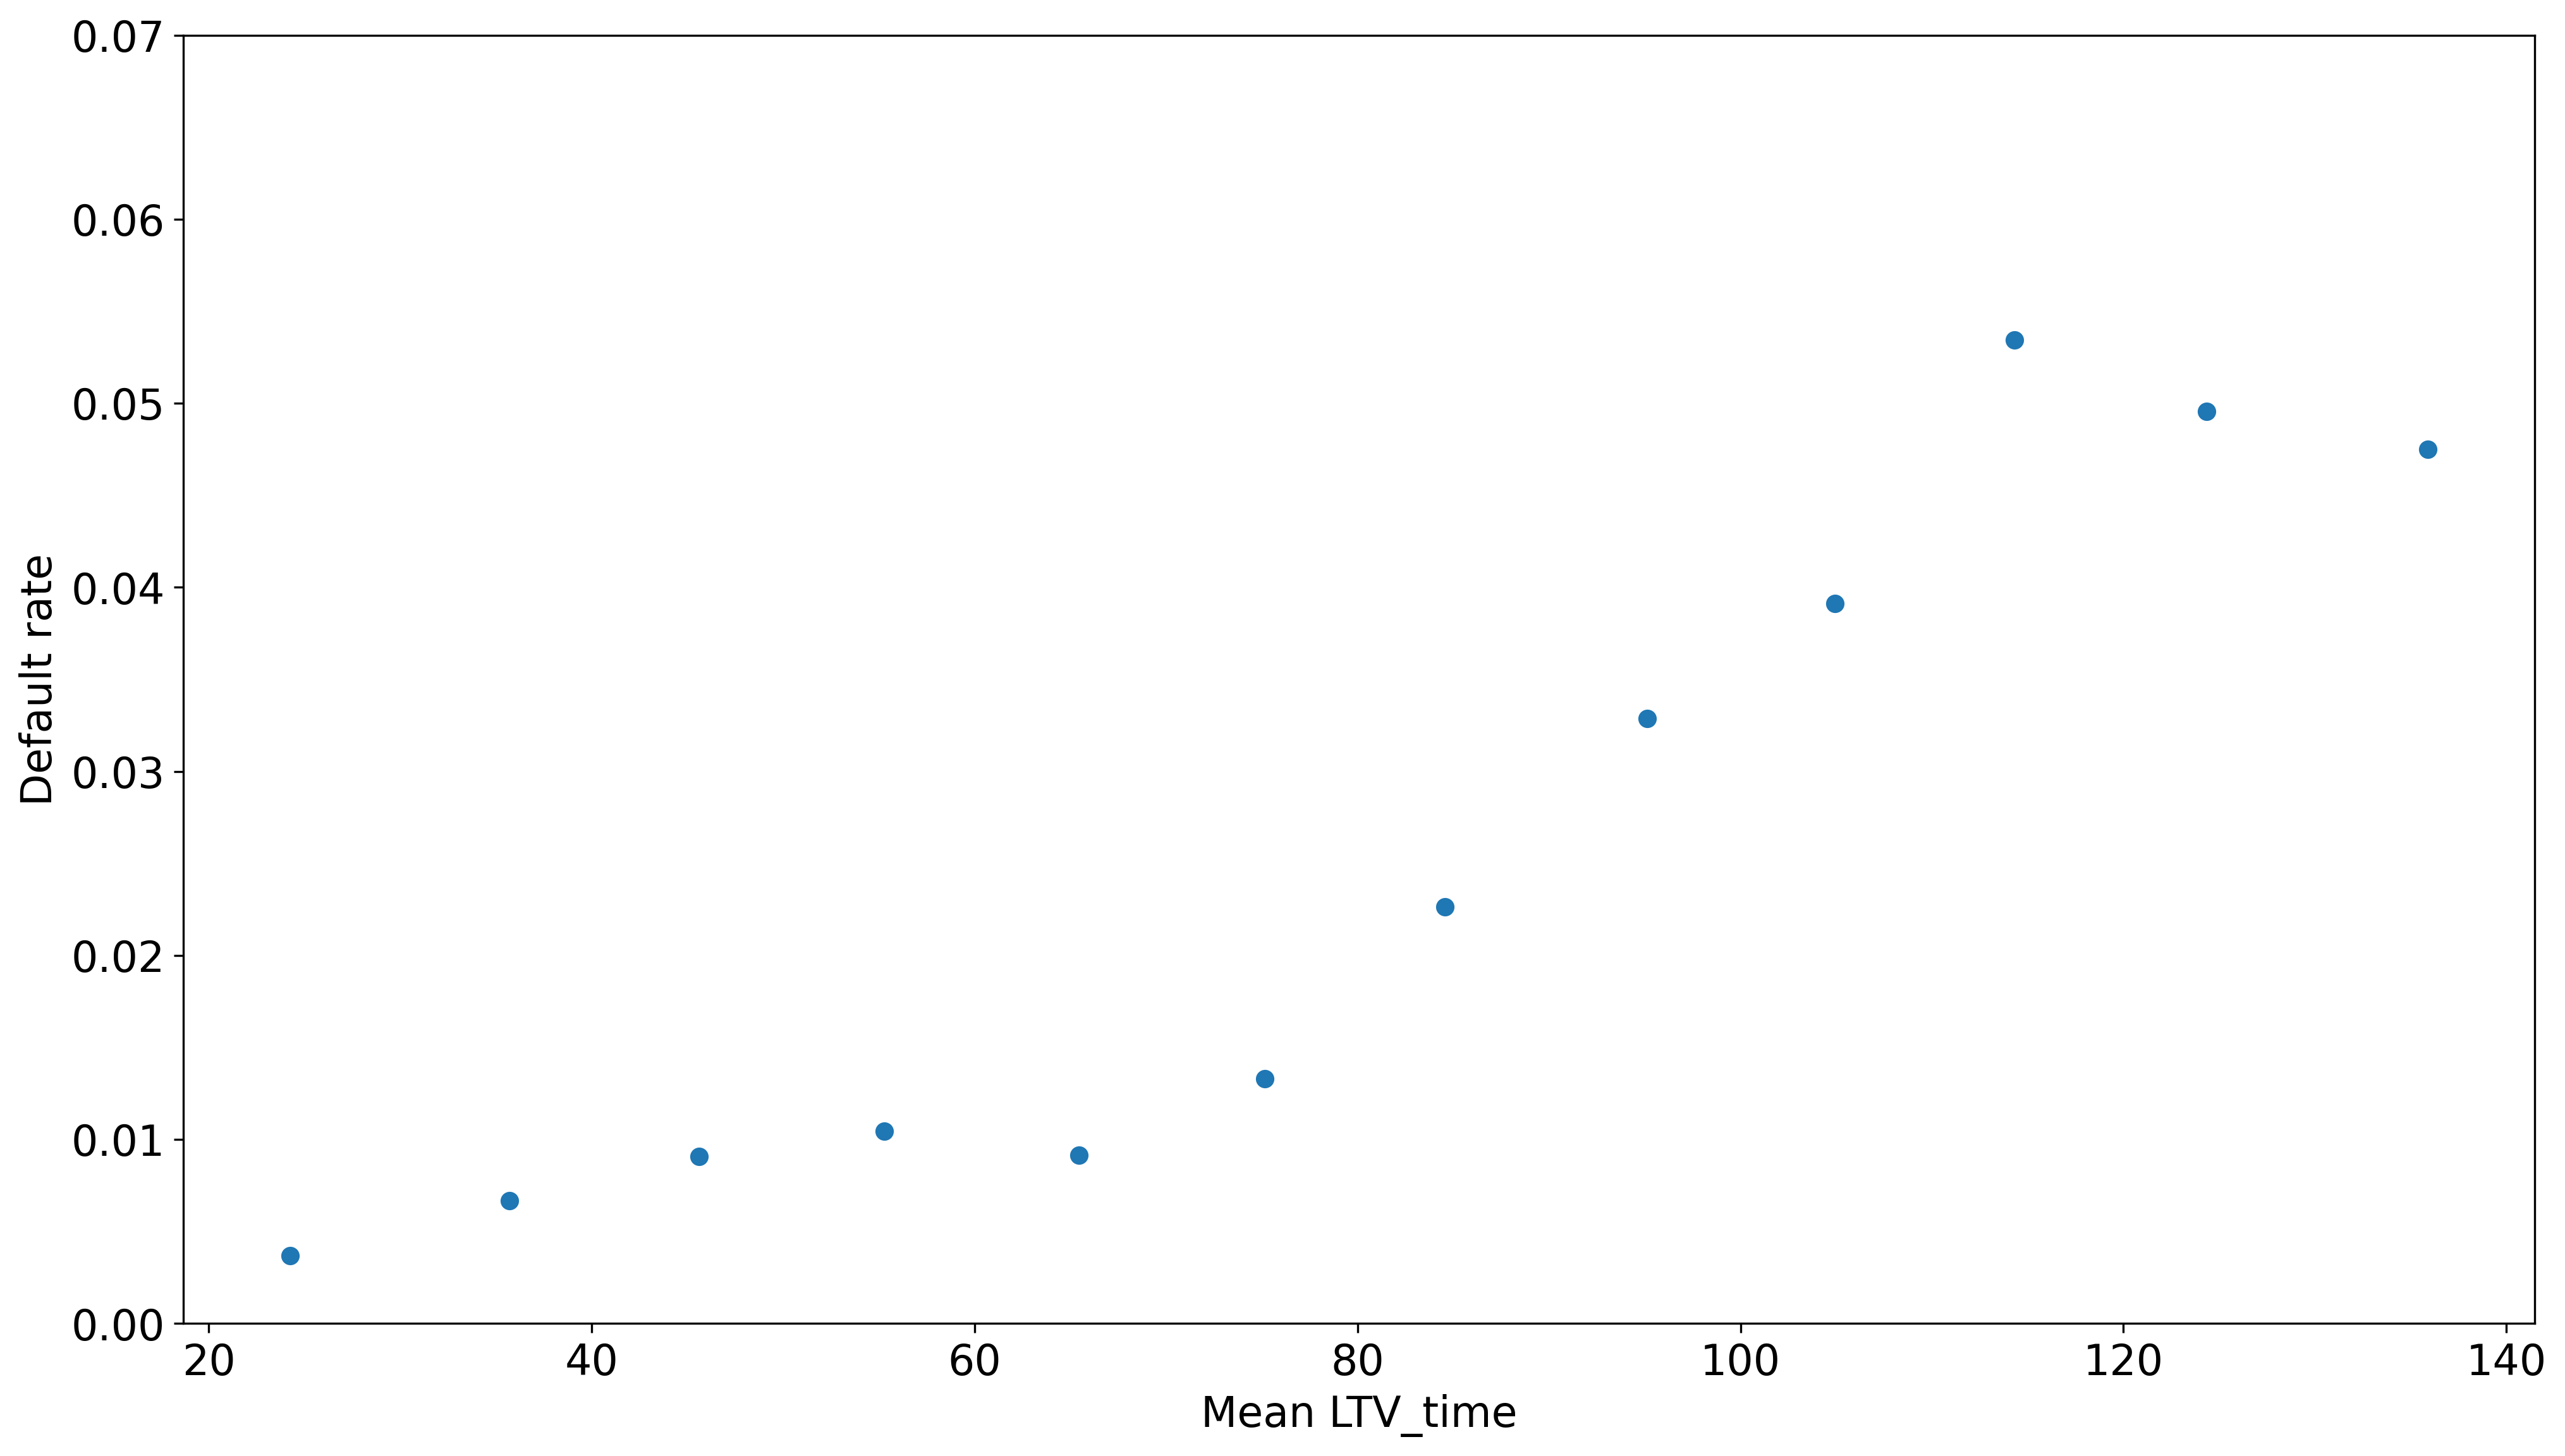

In [37]:
data.loc[:,'LTV_time_cat'] = 0
data.loc[data['LTV_time'] >= 10, 'LTV_time_cat'] = 1
data.loc[data['LTV_time'] >= 20, 'LTV_time_cat'] = 2
data.loc[data['LTV_time'] >= 30, 'LTV_time_cat'] = 3
data.loc[data['LTV_time'] >= 40, 'LTV_time_cat'] = 4
data.loc[data['LTV_time'] >= 50, 'LTV_time_cat'] = 5
data.loc[data['LTV_time'] >= 60, 'LTV_time_cat'] = 6
data.loc[data['LTV_time'] >= 70, 'LTV_time_cat'] = 7
data.loc[data['LTV_time'] >= 80, 'LTV_time_cat'] = 8
data.loc[data['LTV_time'] >= 90, 'LTV_time_cat'] = 9
data.loc[data['LTV_time'] >= 100, 'LTV_time_cat'] = 10
data.loc[data['LTV_time'] >= 110, 'LTV_time_cat'] = 11
data.loc[data['LTV_time'] >= 120, 'LTV_time_cat'] = 12
data.loc[data['LTV_time'] >= 130, 'LTV_time_cat'] = 13
data.loc[data['LTV_time'] >= 140, 'LTV_time_cat'] = 14

LTV_time_cat_means = data.groupby('LTV_time_cat')[['LTV_time', 'default_time']].mean()

plt.scatter('LTV_time', 'default_time', data=LTV_time_cat_means)
plt.ylabel('Default rate')
plt.xlabel('Mean LTV_time')
plt.ylim([0, 0.07])
plt.show()

## Option 1: Polynomials

In [38]:
data.loc[:,'LTV_time_p1'] = data.loc[:,'LTV_time']**1
data.loc[:,'LTV_time_p2'] = data.loc[:,'LTV_time']**2
data.loc[:,'LTV_time_p3'] = data.loc[:,'LTV_time']**3

## Option 2: Splines

### Relative Reference Coding

In [39]:
data.loc[:,'LTV_time_sr1'] = data.loc[:,'LTV_time']
data.loc[:,'LTV_time_sr2'] = 0
data.loc[:,'LTV_time_sr3'] = 0

data.loc[:,'LTV_time_80'] = data.loc[:,'LTV_time']-80
data.loc[:,'LTV_time_120'] = data.loc[:,'LTV_time']-120

data.loc[data['LTV_time'] > 80, 'LTV_time_sr2'] = data.loc[:,'LTV_time_80']
data.loc[data['LTV_time'] > 120, 'LTV_time_sr3'] = data.loc[:,'LTV_time_120']

In [40]:
data2 = data[['LTV_time_sr1', 'LTV_time_sr2', 'LTV_time_sr3']]

print(data2.describe().round(decimals=2))

       LTV_time_sr1  LTV_time_sr2  LTV_time_sr3
count      62153.00      62178.00      62178.00
mean          83.09         11.31          0.51
std           24.13         14.98          2.60
min           22.58          0.00          0.00
25%           67.06          0.00          0.00
50%           82.26          2.24          0.00
75%          100.77         20.76          0.00
max          138.61         58.61         18.61


### Absolute Reference Coding

In [41]:
data.loc[:,'LTV_time_sa1'] = data.loc[:,'LTV_time']
data.loc[:,'LTV_time_sa2'] = 80
data.loc[:,'LTV_time_sa3'] = 120

data.loc[data['LTV_time'] > 80, 'LTV_time_sa2'] = data.loc[:,'LTV_time']
data.loc[data['LTV_time'] > 120, 'LTV_time_sa3'] = data.loc[:,'LTV_time']

In [42]:
data2 = data[['LTV_time_sa1', 'LTV_time_sa2', 'LTV_time_sa3']]

print(data2.describe().round(decimals=2))

       LTV_time_sa1  LTV_time_sa2  LTV_time_sa3
count      62153.00      62178.00      62178.00
mean          83.09         91.31        120.51
std           24.13         14.98          2.60
min           22.58         80.00        120.00
25%           67.06         80.00        120.00
50%           82.26         82.24        120.00
75%          100.77        100.76        120.00
max          138.61        138.61        138.61


## Option 3: Categorization

\begin{align*}
C_{k} =
  	\begin{cases}
  		1 & \text{category } k \text{ is given} \cr
  		0 & \text{otherwise}
  	\end{cases}
\end{align*}


In [43]:
data.loc[:,'LTV_time_d1'] = 0
data.loc[:,'LTV_time_d2'] = 0
data.loc[:,'LTV_time_d3'] = 0
data.loc[:,'LTV_time_d4'] = 0
data.loc[:,'LTV_time_d5'] = 0
data.loc[:,'LTV_time_d6'] = 0
data.loc[:,'LTV_time_d7'] = 0
data.loc[:,'LTV_time_d8'] = 0
data.loc[:,'LTV_time_d9'] = 0
data.loc[:,'LTV_time_d10'] = 0
data.loc[:,'LTV_time_d11'] = 0
data.loc[:,'LTV_time_d12'] = 0
data.loc[:,'LTV_time_d13'] = 0
data.loc[:,'LTV_time_d14'] = 0

data.loc[data['LTV_time_cat'] == 1, 'LTV_time_d1'] = 1
data.loc[data['LTV_time_cat'] == 2, 'LTV_time_d2'] = 1
data.loc[data['LTV_time_cat'] == 3, 'LTV_time_d3'] = 1
data.loc[data['LTV_time_cat'] == 4, 'LTV_time_d4'] = 1
data.loc[data['LTV_time_cat'] == 5, 'LTV_time_d5'] = 1
data.loc[data['LTV_time_cat'] == 6, 'LTV_time_d6'] = 1
data.loc[data['LTV_time_cat'] == 7, 'LTV_time_d7'] = 1
data.loc[data['LTV_time_cat'] == 8, 'LTV_time_d8'] = 1
data.loc[data['LTV_time_cat'] == 9, 'LTV_time_d9'] = 1
data.loc[data['LTV_time_cat'] == 10, 'LTV_time_d10'] = 1
data.loc[data['LTV_time_cat'] == 11, 'LTV_time_d11'] = 1
data.loc[data['LTV_time_cat'] == 12, 'LTV_time_d12'] = 1
data.loc[data['LTV_time_cat'] == 13, 'LTV_time_d13'] = 1
data.loc[data['LTV_time_cat'] == 14, 'LTV_time_d14'] = 1

In [44]:
data.loc[:,'LTV_time_cat'] = pd.Categorical(data.LTV_time_cat, ordered=False)

## Option 4: Weight-of-Evidence

\begin{align*}
WOE_k=ln(\frac{\% \text{defaults}_k}{\% \text{nondefaults}_k})
\end{align*}

 - Univariate concept
 - Logistic regression model
 - Observed default rates represent the data-generating process
 - Concept is not precise if assumptions are violated
 

In [45]:
table = pd.crosstab(data.LTV_time_cat, data.default_time, margins= True)

table = table.drop(['All'], axis=0)
table = table.rename(columns={1: 'deft', 0: 'nondeft'}).reset_index(drop=False)

table.loc[:,'fracdeft'] = table.loc[:,'deft']/np.sum(table.loc[:,'deft'])
table.loc[:,'fracnondeft'] = table.loc[:,'nondeft']/np.sum(table.loc[:,'nondeft'])

table.loc[:,'LTV_time_WOE'] = np.log(table.loc[:,'fracdeft']/table.loc[:,'fracnondeft'])

print(table[['LTV_time_cat', 'fracdeft', 'fracnondeft', 'LTV_time_WOE']].round(decimals=2))

default_time  LTV_time_cat  fracdeft  fracnondeft  LTV_time_WOE
0                        0      0.00         0.00          0.51
1                        2      0.00         0.02         -1.92
2                        3      0.01         0.02         -1.32
3                        4      0.02         0.05         -1.01
4                        5      0.03         0.08         -0.87
..                     ...       ...          ...           ...
8                        9      0.17         0.12          0.30
9                       10      0.18         0.11          0.48
10                      11      0.20         0.09          0.81
11                      12      0.07         0.03          0.73
12                      13      0.05         0.02          0.68

[13 rows x 4 columns]


In [46]:
table2 = table[['LTV_time_cat', 'LTV_time_WOE']]

data = pd.merge(data, table2, on='LTV_time_cat')

## Impact of Transformations on Fitted Default Rates

In [47]:
option1 = smf.glm(data=data, formula='default_time ~ LTV_time_p1 + LTV_time_p2 + LTV_time_p3', family=sm.families.Binomial()).fit()
option2 = smf.glm(data=data, formula='default_time ~ LTV_time_sa1 + LTV_time_sa2 + LTV_time_sa3', family=sm.families.Binomial()).fit()

data.loc[:,'LTV_time_cat'] = pd.Categorical(data.LTV_time_cat, ordered=False)

option3 = smf.glm(data=data, formula='default_time ~ LTV_time_cat', family=sm.families.Binomial()).fit()
option4 = smf.glm(data=data, formula='default_time ~ LTV_time_WOE', family=sm.families.Binomial()).fit()

In [48]:
option1 = pd.DataFrame(option1.predict(data), columns = ['option1'])
option2 = pd.DataFrame(option2.predict(data), columns = ['option2'])
option3 = pd.DataFrame(option3.predict(data), columns = ['option3'])
option4 = pd.DataFrame(option4.predict(data), columns = ['option4'])

data2 = pd.concat([data.default_time, data.LTV_time_cat, data.LTV_time, option1, option2, option3, option4], axis=1)

data_means = data2.groupby('LTV_time_cat')[['default_time', 'LTV_time', 'option1', 'option2', 'option3', 'option4']].mean()

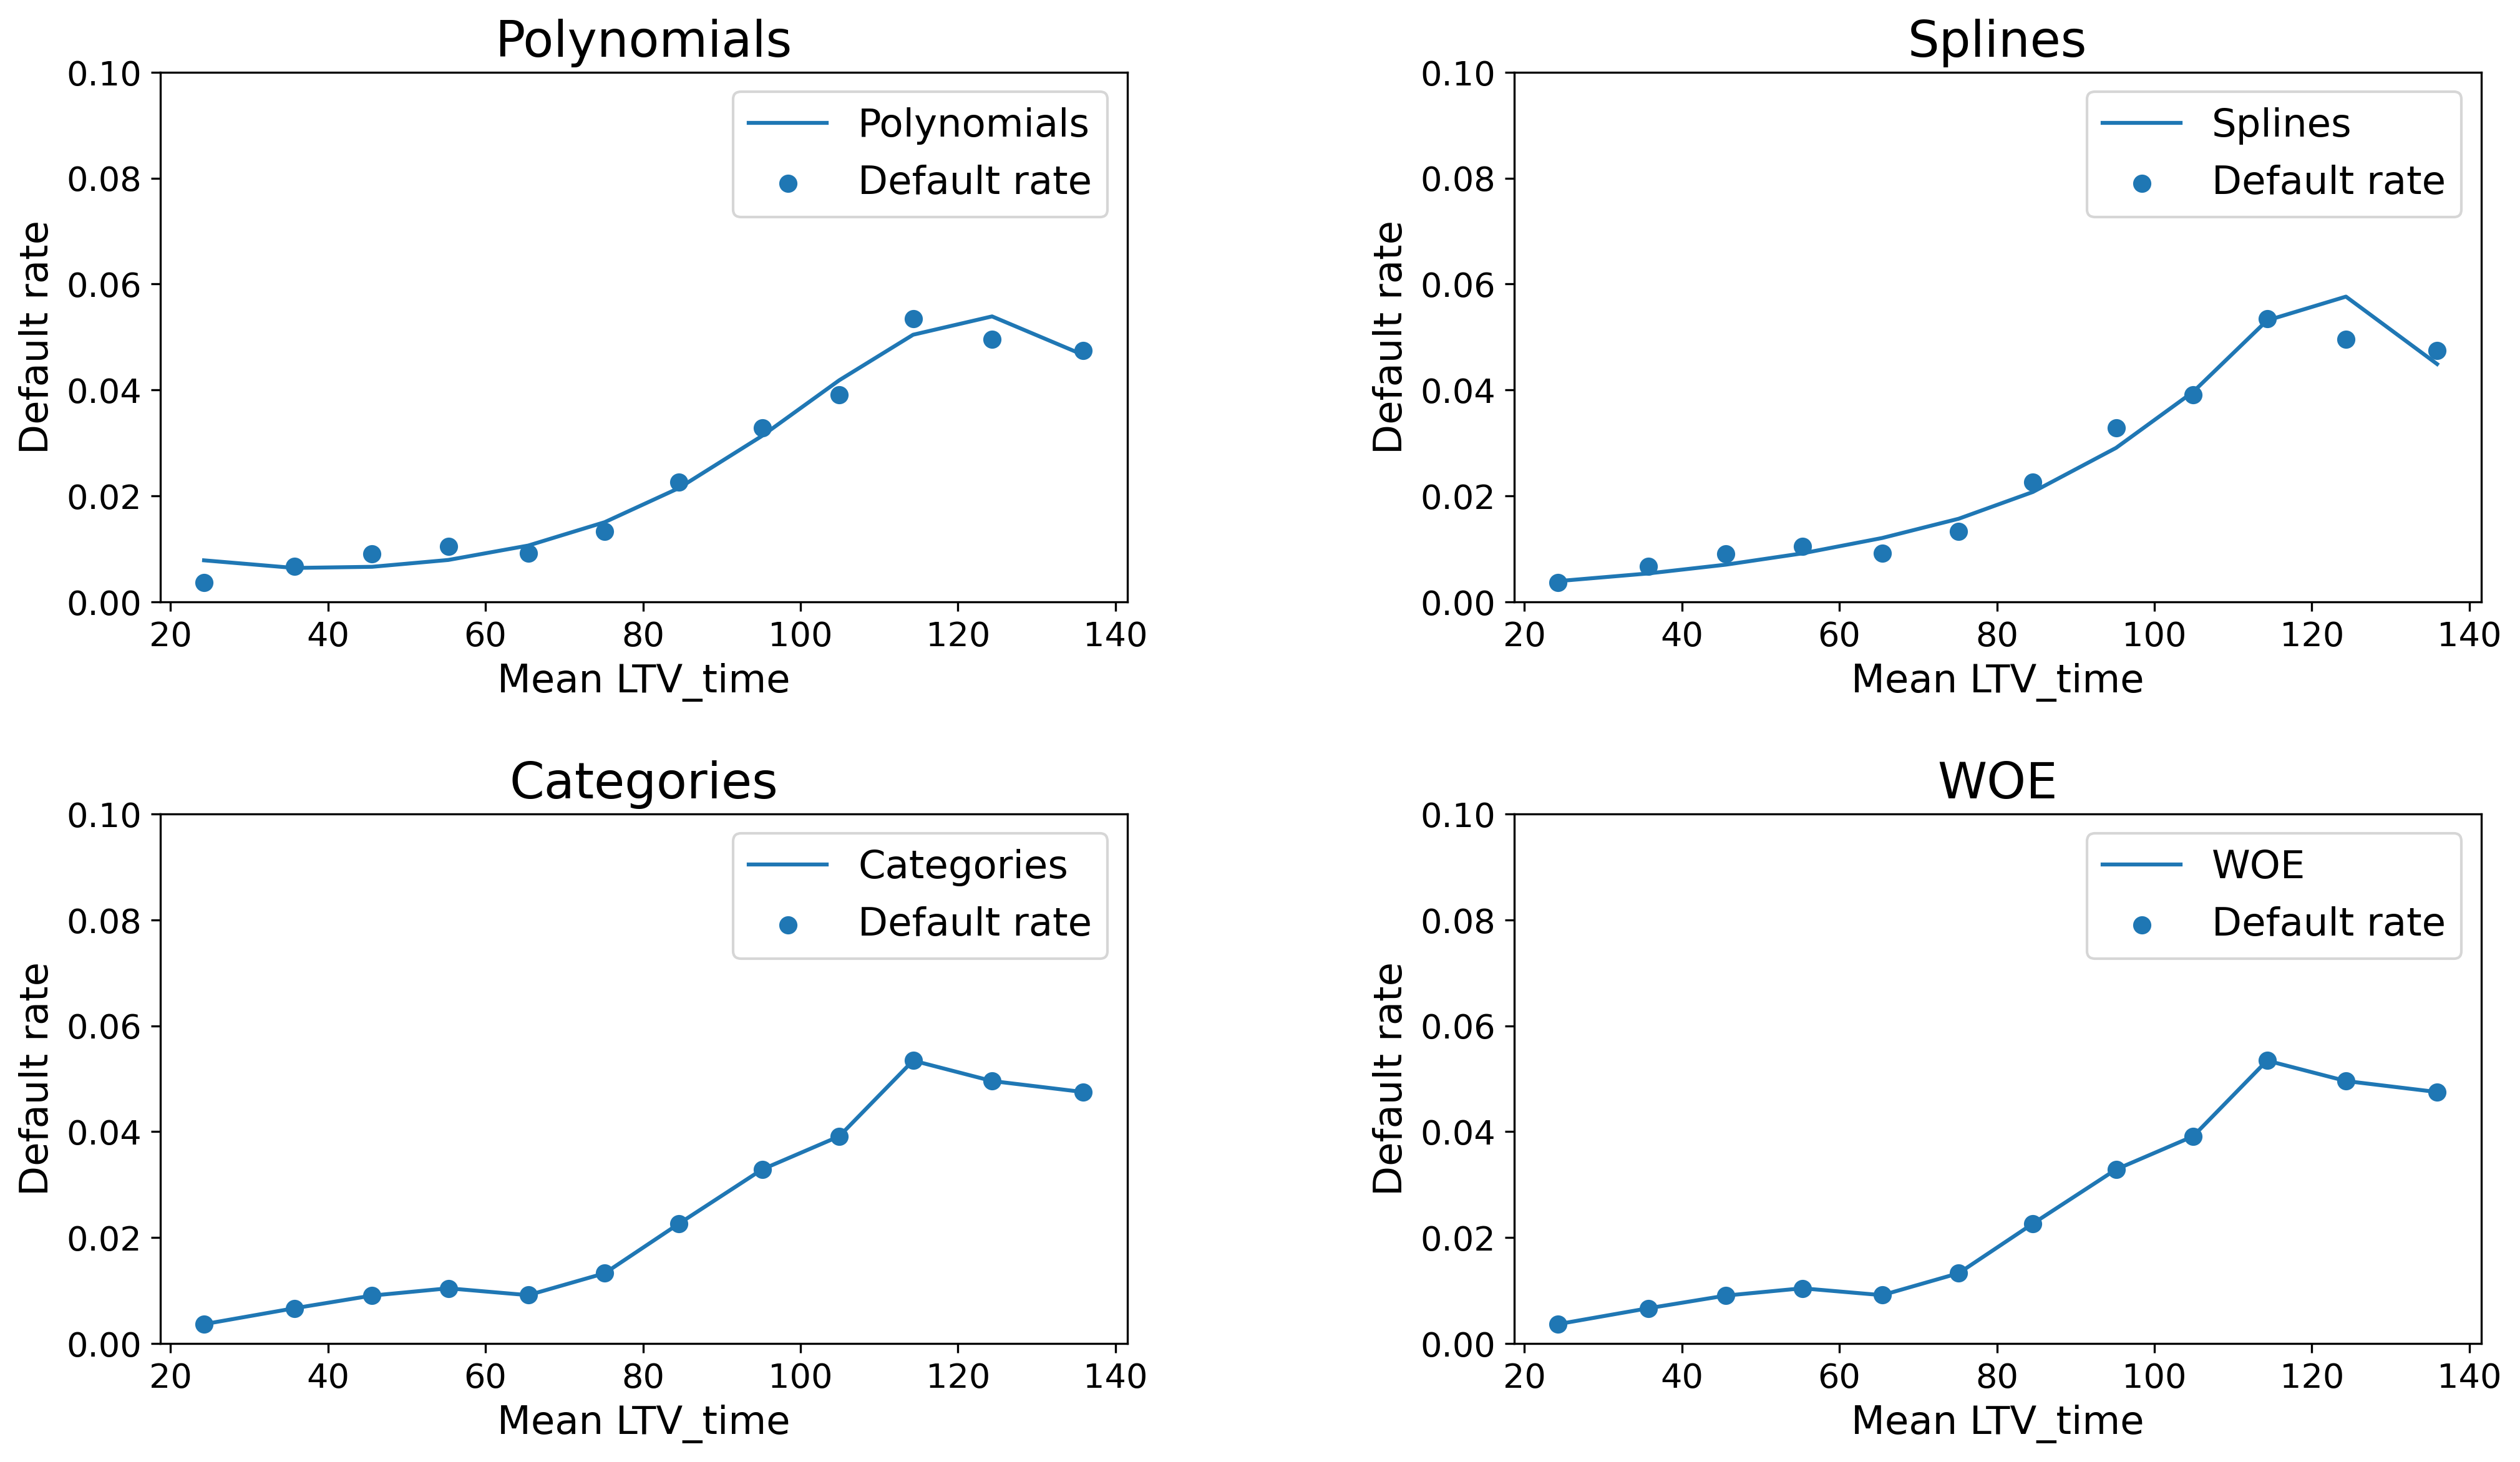

In [49]:
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(221)
plt.title('Polynomials')
plt.scatter('LTV_time', 'default_time', data=data_means, label='Default rate')
plt.plot('LTV_time', 'option1', data=data_means, label='Polynomials')
plt.ylabel('Default rate', fontsize=15)
plt.xlabel('Mean LTV_time', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.ylim([0, 0.10])
plt.legend(loc='best', fontsize=15)

plt.subplot(222)
plt.title('Splines')
plt.scatter('LTV_time', 'default_time', data=data_means, label='Default rate')
plt.plot('LTV_time', 'option2', data=data_means, label='Splines')
plt.ylabel('Default rate', fontsize=15)
plt.xlabel('Mean LTV_time', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.ylim([0, 0.10])
plt.legend(loc='best', fontsize=15)

plt.subplot(223)
plt.title('Categories')
plt.scatter('LTV_time', 'default_time', data=data_means, label='Default rate')
plt.plot('LTV_time', 'option3', data=data_means, label='Categories')
plt.ylabel('Default rate', fontsize=15)
plt.xlabel('Mean LTV_time', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.ylim([0, 0.10])
plt.legend(loc='best', fontsize=15)

plt.subplot(224)
plt.title('WOE')
plt.scatter('LTV_time', 'default_time', data=data_means, label='Default rate')
plt.plot('LTV_time', 'option4', data=data_means, label='WOE')
plt.ylabel('Default rate', fontsize=15)
plt.xlabel('Mean LTV_time', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.ylim([0, 0.10])
plt.legend(loc='best', fontsize=15)
plt.show()

# Sandbox Problems

 - Describe and interpret the following features: `FICO_orig_time` and `LTV_orig_time`.
 - Standardize the features `FICO_orig_time` and `LTV_orig_time` using the standard scaler from `scikit-learn`.

# Copyright and Disclaimer

Copyright: The workshop resources provided to you by Deep Credit Risk are
protected by copyright. You are not permitted to distribute or re-use the workshop materials for
commercial purposes without permission of Deep Credit Risk.

Limit of Liability/Disclaimer of Warranty: While the authors and Deep Credit Risk have used their best effort
in preparing this material, they make no representations or warranties with respect to
the accuracy or completeness of the contents and specifically disclaim any implied
warranties of merchantability or fitness for a particular purpose. No warranty may be
created or extended by sales representatives or written sales materials. The advise and
strategies contained herein may not be suitable for your situation. The authors and Deep Credit Risk shall not
be liable for any loss of profit or any other commercial damages, including but not
limited to special, incidental, consequential, or other damages.